In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [151]:
%matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)

## National Data Initial EDA

In [3]:
df_national = pd.read_csv("data/National_Custom_Data.csv", thousands =',')

In [4]:
df_national.head()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,THRESHOLD,BASELINE,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,National,NaN,All,2019-20,40,5.7,5.3,5.2,16,2703,52452,> 100%
1,National,NaN,All,2019-20,41,5.7,5.4,5.3,16,2769,52860,> 100%
2,National,NaN,All,2019-20,42,5.8,5.5,5.5,18,2976,54129,> 100%
3,National,NaN,All,2019-20,43,5.9,5.6,5.6,30,2985,53914,> 100%
4,National,NaN,All,2019-20,44,6.0,5.7,5.4,31,2907,53980,> 100%


In [5]:
df_national['AGE GROUP'].unique()
# looks like no data is provided by age group at this level

array(['All'], dtype=object)

In [6]:
df_national.columns

Index(['AREA', 'SUB AREA', 'AGE GROUP', 'SEASON', 'WEEK', 'THRESHOLD',
       'BASELINE', 'PERCENT P&I', 'NUM INFLUENZA DEATHS',
       'NUM PNEUMONIA DEATHS', 'TOTAL DEATHS', 'PERCENT COMPLETE'],
      dtype='object')

In [7]:
df_national.columns = ['Area', 'Sub_Area','Age_Group', 
                      'Season', 'Week', 'Threshold', 'Baseline'
                     ,'Percent_P_I', 'Num_Influenza_Deaths',
                     'Num_Pneumonia_Deaths','Total_Deaths', 'Percent_Complete']
#rename columns to remove spaces

In [8]:
df_national.columns

Index(['Area', 'Sub_Area', 'Age_Group', 'Season', 'Week', 'Threshold',
       'Baseline', 'Percent_P_I', 'Num_Influenza_Deaths',
       'Num_Pneumonia_Deaths', 'Total_Deaths', 'Percent_Complete'],
      dtype='object')

In [9]:
df_national.head()

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete
0,National,NaN,All,2019-20,40,5.7,5.3,5.2,16,2703,52452,> 100%
1,National,NaN,All,2019-20,41,5.7,5.4,5.3,16,2769,52860,> 100%
2,National,NaN,All,2019-20,42,5.8,5.5,5.5,18,2976,54129,> 100%
3,National,NaN,All,2019-20,43,5.9,5.6,5.6,30,2985,53914,> 100%
4,National,NaN,All,2019-20,44,6.0,5.7,5.4,31,2907,53980,> 100%


In [10]:
# Logic to add a Calendar Year Column
x = '2019-20'
int(x[0:4])
int(x[0:4])+1
#Week >=40 --> int(x[0:4])
#Week 1-39 --> int(x[0:4])+1

2020

In [11]:
conditions = [
    df_national['Week']<40,
    df_national['Week']>=40    
]

In [12]:
df_national['First_Year'] = df_national['Season'].apply(lambda x: int(x[0:4])) 

In [13]:
df_national['Second_Year'] = df_national['Season'].apply(lambda x: int(x[0:4])+1) 

In [14]:
choices = [df_national['Second_Year'],df_national['First_Year']]

In [15]:
df_national['Calendar_Year'] = np.select(conditions,choices)

In [16]:
df_national.sample(10)

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
330,National,NaN,All,2013-14,32,6.4,6.0,6.0,1,2826,46885,98.5%,2013,2014,2014
292,National,NaN,All,2013-14,46,7.4,7.0,6.7,15,3320,49409,> 100%,2013,2014,2013
54,National,NaN,All,2018-19,17,6.8,6.5,6.4,156,3267,53622,> 100%,2018,2019,2019
331,National,NaN,All,2013-14,33,6.4,6.0,6.2,5,2864,46646,98%,2013,2014,2014
227,National,NaN,All,2015-16,34,5.9,5.6,5.7,6,2827,49509,> 100%,2015,2016,2016
174,National,NaN,All,2016-17,33,5.8,5.4,5.4,11,2689,50185,> 100%,2016,2017,2017
320,National,NaN,All,2013-14,22,7.2,6.8,6.6,15,3140,48163,> 100%,2013,2014,2014
93,National,NaN,All,2017-18,4,7.6,7.3,10.6,1448,5187,62780,> 100%,2017,2018,2018
28,National,NaN,All,2018-19,43,6.1,5.8,5.7,24,3065,53763,> 100%,2018,2019,2018
293,National,NaN,All,2013-14,47,7.5,7.1,7.0,28,3430,49591,> 100%,2013,2014,2013


In [34]:
# df_national.drop('First_Year', axis = 1, inplace = True)
# df_national.drop('Second_Year', axis = 1, inplace = True)
# df_national.drop('Sub_Area', axis = 1, inplace = True)
# df_national.drop('Age_Group', axis = 1, inplace = True)
                 

In [18]:
df_national.head()

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
0,National,NaN,All,2019-20,40,5.7,5.3,5.2,16,2703,52452,> 100%,2019,2020,2019
1,National,NaN,All,2019-20,41,5.7,5.4,5.3,16,2769,52860,> 100%,2019,2020,2019
2,National,NaN,All,2019-20,42,5.8,5.5,5.5,18,2976,54129,> 100%,2019,2020,2019
3,National,NaN,All,2019-20,43,5.9,5.6,5.6,30,2985,53914,> 100%,2019,2020,2019
4,National,NaN,All,2019-20,44,6.0,5.7,5.4,31,2907,53980,> 100%,2019,2020,2019


In [19]:
df_national.dtypes

Area                     object
Sub_Area                float64
Age_Group                object
Season                   object
Week                      int64
Threshold               float64
Baseline                float64
Percent_P_I             float64
Num_Influenza_Deaths      int64
Num_Pneumonia_Deaths      int64
Total_Deaths              int64
Percent_Complete         object
First_Year                int64
Second_Year               int64
Calendar_Year             int64
dtype: object

In [20]:
df_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 15 columns):
Area                    338 non-null object
Sub_Area                0 non-null float64
Age_Group               338 non-null object
Season                  338 non-null object
Week                    338 non-null int64
Threshold               338 non-null float64
Baseline                338 non-null float64
Percent_P_I             338 non-null float64
Num_Influenza_Deaths    338 non-null int64
Num_Pneumonia_Deaths    338 non-null int64
Total_Deaths            338 non-null int64
Percent_Complete        338 non-null object
First_Year              338 non-null int64
Second_Year             338 non-null int64
Calendar_Year           338 non-null int64
dtypes: float64(4), int64(7), object(4)
memory usage: 39.7+ KB


In [21]:
df_national.describe()

,Sub_Area,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,First_Year,Second_Year,Calendar_Year
count,0.0,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,NaN,26.618343,6.976331,6.600296,6.771893,154.562130,3445.701183,52804.973373,2015.754438,2016.754438,2016.482249
std,NaN,15.507610,0.838981,0.824855,1.175849,259.909498,620.111191,3657.505221,1.884356,1.884356,1.904542
min,NaN,1.000000,5.400000,5.100000,4.900000,1.000000,2511.000000,40002.000000,2013.000000,2014.000000,2013.000000
25%,NaN,13.000000,6.300000,5.900000,5.900000,11.000000,2982.000000,50259.000000,2014.000000,2015.000000,2015.000000
50%,NaN,27.000000,7.000000,6.600000,6.500000,30.500000,3234.000000,52106.000000,2016.000000,2017.000000,2016.000000
75%,NaN,40.750000,7.600000,7.200000,7.500000,205.250000,3848.000000,55235.500000,2017.000000,2018.000000,2018.000000
max,NaN,53.000000,8.600000,8.200000,10.900000,1626.000000,5589.000000,67495.000000,2019.000000,2020.000000,2020.000000


In [22]:
years = list(df_national['Calendar_Year'].unique())
years.sort()


Text(0, 0.5, 'Total US Deaths')

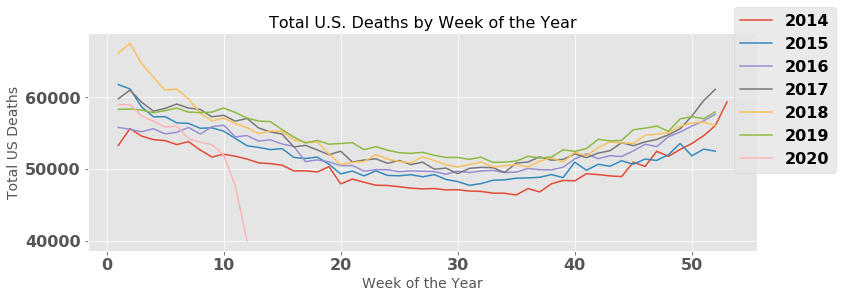

In [23]:
fig, ax = plt.subplots(figsize=(12, 4))


for year in years[1:]:
    mask = df_national['Calendar_Year'] == year
    df = df_national[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_Deaths']
    
    ax.plot(x,y, label = year)

    
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
# ax.axhline(y=50000, color='grey', linestyle='--')

ax.set_title("Total U.S. Deaths by Week of the Year", fontsize = 16)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Total US Deaths", fontsize = 14)

Text(0, 0.5, '%Deaths due to Flu&Pneumonia')

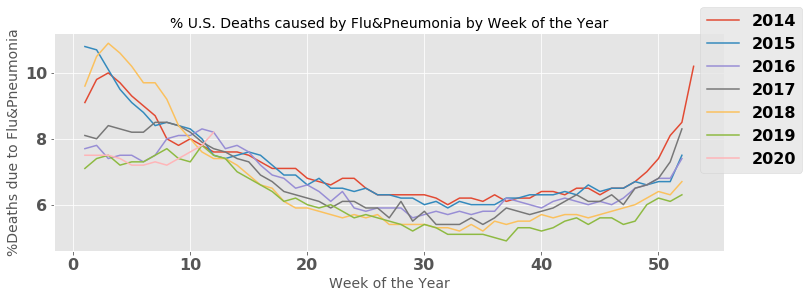

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))


for year in years[1:]:
    mask = df_national['Calendar_Year'] == year
    df = df_national[mask].sort_values('Week')
    x = df['Week']
    y = df['Percent_P_I']

    ax.plot(x,y, label = year)

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

ax.set_title("% U.S. Deaths caused by Flu&Pneumonia by Week of the Year", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("%Deaths due to Flu&Pneumonia", fontsize = 14)

In [25]:
#finding out how many weeks have <100% completeness
mask_national_incomplete = df_national['Percent_Complete'] != '> 100%'

In [26]:
df_national_incomplete_wks = df_national[mask_national_incomplete]

In [27]:
df_national_incomplete_wks.describe()

,Sub_Area,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,First_Year,Second_Year,Calendar_Year
count,0.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000,16.000,16.000000
mean,NaN,31.000000,6.606250,6.212500,6.412500,25.187500,2954.937500,46626.500000,2013.375,2014.375,2014.250000
std,NaN,6.947422,0.248914,0.265518,0.509738,81.592662,98.506493,1796.560937,1.500,1.500,1.570563
min,NaN,12.000000,6.400000,6.000000,6.000000,1.000000,2812.000000,40002.000000,2013.000,2014.000,2013.000000
25%,NaN,27.750000,6.400000,6.000000,6.200000,3.000000,2872.250000,46772.000000,2013.000,2014.000,2014.000000
50%,NaN,31.500000,6.500000,6.100000,6.300000,5.000000,2949.500000,47110.000000,2013.000,2014.000,2014.000000
75%,NaN,35.250000,6.800000,6.400000,6.350000,6.250000,2989.000000,47295.000000,2013.000,2014.000,2014.000000
max,NaN,41.000000,7.200000,6.900000,8.200000,331.000000,3140.000000,47540.000000,2019.000,2020.000,2020.000000


In [28]:
df_national_incomplete_wks.head(16)
# looks like I can only go through Week 11 in National Data. 2014 data looks to be missing around 2%

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
24,National,NaN,All,2019-20,12,7.2,6.9,8.2,331,2930,40002,84.1%,2019,2020,2020
286,National,NaN,All,2013-14,40,6.8,6.4,6.6,3,3140,47492,99.8%,2013,2014,2013
287,National,NaN,All,2013-14,41,6.9,6.5,6.7,12,3135,47304,99.4%,2013,2014,2013
323,National,NaN,All,2013-14,25,6.9,6.5,6.5,7,3070,47540,99.9%,2013,2014,2014
324,National,NaN,All,2013-14,26,6.8,6.4,6.3,3,2989,47341,99.5%,2013,2014,2014
325,National,NaN,All,2013-14,27,6.7,6.3,6.3,6,2989,47240,99.3%,2013,2014,2014
326,National,NaN,All,2013-14,28,6.6,6.2,6.3,4,2982,47292,99.4%,2013,2014,2014
327,National,NaN,All,2013-14,29,6.5,6.1,6.3,7,2939,47098,99%,2013,2014,2014
328,National,NaN,All,2013-14,30,6.5,6.1,6.3,3,2983,47122,99%,2013,2014,2014
329,National,NaN,All,2013-14,31,6.4,6.0,6.2,5,2919,46936,98.6%,2013,2014,2014


In [29]:
df_national['Percent_Complete'] = df_national['Percent_Complete'].str.replace('> 100%', '100%', regex=False)

In [30]:
df_national['Percent_Complete'] = df_national['Percent_Complete'].str.rstrip('%').astype('float') / 100.0

In [31]:
df_national.describe()

,Sub_Area,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
count,0.0,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,NaN,26.618343,6.976331,6.600296,6.771893,154.562130,3445.701183,52804.973373,0.999047,2015.754438,2016.754438,2016.482249
std,NaN,15.507610,0.838981,0.824855,1.175849,259.909498,620.111191,3657.505221,0.009027,1.884356,1.884356,1.904542
min,NaN,1.000000,5.400000,5.100000,4.900000,1.000000,2511.000000,40002.000000,0.841000,2013.000000,2014.000000,2013.000000
25%,NaN,13.000000,6.300000,5.900000,5.900000,11.000000,2982.000000,50259.000000,1.000000,2014.000000,2015.000000,2015.000000
50%,NaN,27.000000,7.000000,6.600000,6.500000,30.500000,3234.000000,52106.000000,1.000000,2016.000000,2017.000000,2016.000000
75%,NaN,40.750000,7.600000,7.200000,7.500000,205.250000,3848.000000,55235.500000,1.000000,2017.000000,2018.000000,2018.000000
max,NaN,53.000000,8.600000,8.200000,10.900000,1626.000000,5589.000000,67495.000000,1.000000,2019.000000,2020.000000,2020.000000


In [32]:
df_national_official = df_national.sort_values(['Calendar_Year','Week']).reset_index()

In [33]:
df_national_official.head()

,index,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
0,286,National,NaN,All,2013-14,40,6.8,6.4,6.6,3,3140,47492,0.998,2013,2014,2013
1,287,National,NaN,All,2013-14,41,6.9,6.5,6.7,12,3135,47304,0.994,2013,2014,2013
2,288,National,NaN,All,2013-14,42,7.0,6.6,6.8,11,3216,47602,1.000,2013,2014,2013
3,289,National,NaN,All,2013-14,43,7.1,6.7,6.6,11,3151,47746,1.000,2013,2014,2013
4,290,National,NaN,All,2013-14,44,7.2,6.8,6.7,12,3271,48777,1.000,2013,2014,2013


In [35]:
# df_national_official.drop('index', axis = 1, inplace = True)


In [36]:
df_national_official.head()

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
0,National,NaN,All,2013-14,40,6.8,6.4,6.6,3,3140,47492,0.998,2013,2014,2013
1,National,NaN,All,2013-14,41,6.9,6.5,6.7,12,3135,47304,0.994,2013,2014,2013
2,National,NaN,All,2013-14,42,7.0,6.6,6.8,11,3216,47602,1.000,2013,2014,2013
3,National,NaN,All,2013-14,43,7.1,6.7,6.6,11,3151,47746,1.000,2013,2014,2013
4,National,NaN,All,2013-14,44,7.2,6.8,6.7,12,3271,48777,1.000,2013,2014,2013


In [37]:
df_national_official.describe()

,Sub_Area,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
count,0.0,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,NaN,26.618343,6.976331,6.600296,6.771893,154.562130,3445.701183,52804.973373,0.999047,2015.754438,2016.754438,2016.482249
std,NaN,15.507610,0.838981,0.824855,1.175849,259.909498,620.111191,3657.505221,0.009027,1.884356,1.884356,1.904542
min,NaN,1.000000,5.400000,5.100000,4.900000,1.000000,2511.000000,40002.000000,0.841000,2013.000000,2014.000000,2013.000000
25%,NaN,13.000000,6.300000,5.900000,5.900000,11.000000,2982.000000,50259.000000,1.000000,2014.000000,2015.000000,2015.000000
50%,NaN,27.000000,7.000000,6.600000,6.500000,30.500000,3234.000000,52106.000000,1.000000,2016.000000,2017.000000,2016.000000
75%,NaN,40.750000,7.600000,7.200000,7.500000,205.250000,3848.000000,55235.500000,1.000000,2017.000000,2018.000000,2018.000000
max,NaN,53.000000,8.600000,8.200000,10.900000,1626.000000,5589.000000,67495.000000,1.000000,2019.000000,2020.000000,2020.000000


In [38]:
mask = df_national_official['Percent_Complete'] <1
df_national_incomplete = df_national_official[mask]
df_national_incomplete.describe()
df_national_incomplete.groupby('Calendar_Year').count()

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year
Calendar_Year,,,,,,,,,,,,,,
2013,2,0,2,2,2,2,2,2,2,2,2,2,2,2
2014,13,0,13,13,13,13,13,13,13,13,13,13,13,13
2020,1,0,1,1,1,1,1,1,1,1,1,1,1,1


In [39]:
df_national_incomplete.groupby('Calendar_Year').mean()['Percent_Complete']

Calendar_Year
2013    0.996000
2014    0.988077
2020    0.841000
Name: Percent_Complete, dtype: float64

In [40]:
label = list(df_national_official['Week'].unique())

In [41]:
labels = sorted(label)
labels

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

In [42]:
labels[0:11]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [43]:
mask = (df_national_official['Week'] == 1) & (df_national_official['Calendar_Year'] == 2019)

In [44]:
x = df_national_official[mask]['Total_Deaths']

In [45]:
x.iloc[0]

58289

In [46]:
years[1:]

[2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [47]:
death_lst = []
year_lst = []
week_lst = []

for i in range(1,len(labels[0:11])+1):
    for year in years[1:]:
        mask = (df_national_official['Week'] == i) & (df_national_official['Calendar_Year'] == year)
        df = df_national_official[mask]
        death_lst.append(df['Total_Deaths'].iloc[0])
        year_lst.append(year)
        week_lst.append(i)

In [48]:
y_w_d = []
for y, w, d in zip(year_lst,week_lst,death_lst):
    y_w_d.append((y,w,d))

In [49]:
y_w_d

[(2014, 1, 53277),
 (2015, 1, 61737),
 (2016, 1, 55788),
 (2017, 1, 59763),
 (2018, 1, 66134),
 (2019, 1, 58289),
 (2020, 1, 58961),
 (2014, 2, 55620),
 (2015, 2, 61141),
 (2016, 2, 55525),
 (2017, 2, 60980),
 (2018, 2, 67495),
 (2019, 2, 58351),
 (2020, 2, 58962),
 (2014, 3, 54580),
 (2015, 3, 58628),
 (2016, 3, 55182),
 (2017, 3, 59293),
 (2018, 3, 64647),
 (2019, 3, 58193),
 (2020, 3, 57371),
 (2014, 4, 54085),
 (2015, 4, 57269),
 (2016, 4, 55606),
 (2017, 4, 58047),
 (2018, 4, 62780),
 (2019, 4, 57834),
 (2020, 4, 56666),
 (2014, 5, 53955),
 (2015, 5, 57284),
 (2016, 5, 54896),
 (2017, 5, 58432),
 (2018, 5, 60974),
 (2019, 5, 58122),
 (2020, 5, 55849),
 (2014, 6, 53397),
 (2015, 6, 56420),
 (2016, 6, 55106),
 (2017, 6, 59038),
 (2018, 6, 61110),
 (2019, 6, 58489),
 (2020, 6, 55992),
 (2014, 7, 53815),
 (2015, 7, 56348),
 (2016, 7, 55785),
 (2017, 7, 58479),
 (2018, 7, 59779),
 (2019, 7, 57915),
 (2020, 7, 54246),
 (2014, 8, 52642),
 (2015, 8, 55668),
 (2016, 8, 54873),
 (2017, 8, 5

In [50]:

deaths_2014 = []
deaths_2015 = []
deaths_2016 = []
deaths_2017 = []
deaths_2018 = []
deaths_2019 = []
deaths_2020 = [] 


for y,w,d in y_w_d:
    if y == 2014:
        deaths_2014.append(d)
    elif y == 2015:
        deaths_2015.append(d)
    elif y == 2016:
        deaths_2016.append(d)
    elif y == 2017:
        deaths_2017.append(d)
    elif y == 2018:
        deaths_2018.append(d)
    elif y == 2019:
        deaths_2019.append(d)
    elif y == 2020:
        deaths_2020.append(d)

In [51]:
deaths_2020

[58961, 58962, 57371, 56666, 55849, 55992, 54246, 53745, 53382, 51978, 47655]

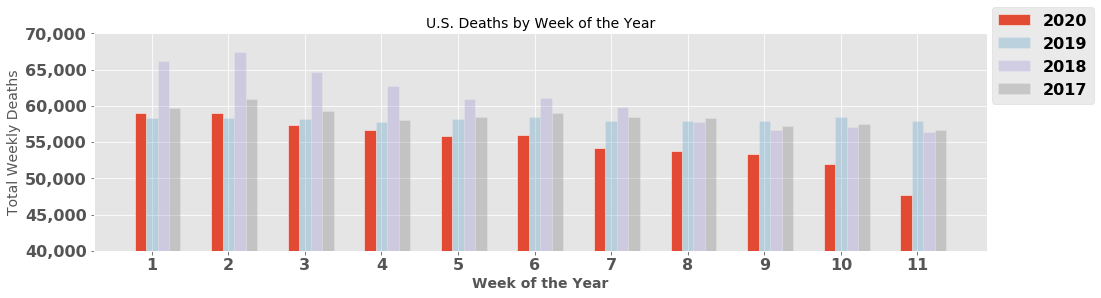

In [52]:
fig, ax = plt.subplots(figsize = (16,4))

# set width of bar
barWidth = 0.15
 
# set height of bar
bars1 = deaths_2020
bars2 = deaths_2019
bars3 = deaths_2018
bars4 = deaths_2017

weeks = labels[0:11]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
ax.bar(r1, bars1,  width=barWidth, edgecolor='white', label='2020')
ax.bar(r2, bars2,  width=barWidth, edgecolor='white', label='2019', alpha = 0.25)
ax.bar(r3, bars3,  width=barWidth, edgecolor='white', label='2018', alpha = 0.3)
ax.bar(r4, bars4,  width=barWidth, edgecolor='white', label='2017', alpha = 0.3)

 
# Add xticks on the middle of the group bars
plt.xlabel('Week of Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)




ax.set_title("U.S. Deaths by Week of the Year", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Total Weekly Deaths", fontsize = 14)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim([40000,70000])
plt.show()

In [154]:
df_national_official['Percent_P_I'] = df_national_official['Percent_P_I']/ 100.0

In [155]:
df_national_official.head()

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
0,National,NaN,All,2013-14,40,6.8,6.4,0.066,3,3140,47492,0.998,2013,2014,2013
1,National,NaN,All,2013-14,41,6.9,6.5,0.067,12,3135,47304,0.994,2013,2014,2013
2,National,NaN,All,2013-14,42,7.0,6.6,0.068,11,3216,47602,1.000,2013,2014,2013
3,National,NaN,All,2013-14,43,7.1,6.7,0.066,11,3151,47746,1.000,2013,2014,2013
4,National,NaN,All,2013-14,44,7.2,6.8,0.067,12,3271,48777,1.000,2013,2014,2013


In [55]:
df_national_official.groupby('Calendar_Year').sum()[['Total_Deaths','Num_Influenza_Deaths','Num_Pneumonia_Deaths']]

,Total_Deaths,Num_Influenza_Deaths,Num_Pneumonia_Deaths
Calendar_Year,,,
2013,643310,566,44786
2014,2664285,6170,187585
2015,2693027,6175,187364
2016,2725761,3698,178220
2017,2804306,8135,180151
2018,2831836,14510,177170
2019,2840747,7448,166865
2020,644809,5540,42506


In [59]:
df_national_official.groupby('Calendar_Year').mean()['Percent_P_I']

Calendar_Year
2013    7.038462
2014    7.218868
2015    7.109615
2016    6.648077
2017    6.663462
2018    6.646154
2019    6.105769
2020    7.483333
Name: Percent_P_I, dtype: float64

In [80]:
df_national_official.to_csv('data/national_cdc_pandas_df.csv')

In [ ]:
#Viz - Total Deaths 2014-2019 (Nationally) - Bar
#Viz - Pct of Deaths by State - Vertical Bar

In [60]:
annual_deaths = df_national_official.groupby('Calendar_Year').sum()[['Total_Deaths']]

In [70]:
annual_deaths.index[1:7]

Int64Index([2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='Calendar_Year')

<BarContainer object of 6 artists>

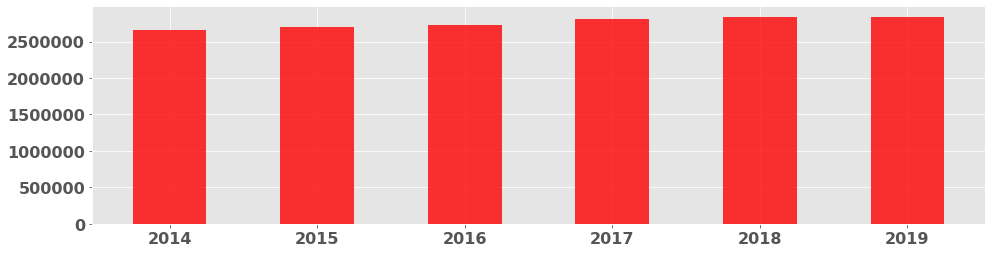

In [79]:
fig, ax = plt.subplots(figsize =(16,4))

ax.bar(annual_deaths.index[1:7],annual_deaths.Total_Deaths[1:7], width = 0.5, align = 'center', color = 'red', alpha = 0.8)

In [ ]:
#Viz - Avg Deaths per Week by year to show seasonality and change in 2020 - Line Graph

In [ ]:
#Viz - Bar Charts for 2020 vs. prior years by Week --> Hypothesis Tests

In [ ]:
#Viz - Distribution of Deaths by Week

In [ ]:
#Viz - % Flu & Pneumonia Deaths by Week --> Hypothesis Tests

In [ ]:
#Viz - Distribution of % Flu & Pneumonia Deaths 

## State Level Data Initial EDA

In [81]:
df_states = pd.read_csv("data/State_Custom_Data.csv", thousands =',')

In [82]:
df_states.head()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,State,Alabama,All,2019-20,40,5.0,0,48,955,98.3%
1,State,Alabama,All,2019-20,41,3.8,0,36,940,96.8%
2,State,Alabama,All,2019-20,42,4.5,0,45,"1,011",> 100%
3,State,Alabama,All,2019-20,43,4.4,2,42,998,> 100%
4,State,Alabama,All,2019-20,44,5.7,2,53,962,99%


In [83]:
df_states.columns

Index(['AREA', 'SUB AREA', 'AGE GROUP', 'SEASON', 'WEEK', 'PERCENT P&I',
       'NUM INFLUENZA DEATHS', 'NUM PNEUMONIA DEATHS', 'TOTAL DEATHS',
       'PERCENT COMPLETE'],
      dtype='object')

In [84]:
df_states.columns = ['Area', 'State','Age_Group', 
                      'Season', 'Week'
                     ,'Percent_P_I', 'Num_Influenza_Deaths',
                     'Num_Pneumonia_Deaths','Total_Deaths', 'Percent_Complete']
#rename columns to remove spaces

In [85]:
df_states.columns

Index(['Area', 'State', 'Age_Group', 'Season', 'Week', 'Percent_P_I',
       'Num_Influenza_Deaths', 'Num_Pneumonia_Deaths', 'Total_Deaths',
       'Percent_Complete'],
      dtype='object')

In [86]:
df_states.head()

,Area,State,Age_Group,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete
0,State,Alabama,All,2019-20,40,5.0,0,48,955,98.3%
1,State,Alabama,All,2019-20,41,3.8,0,36,940,96.8%
2,State,Alabama,All,2019-20,42,4.5,0,45,"1,011",> 100%
3,State,Alabama,All,2019-20,43,4.4,2,42,998,> 100%
4,State,Alabama,All,2019-20,44,5.7,2,53,962,99%


In [87]:
df_states['Area'].unique()

array(['State'], dtype=object)

In [88]:
df_states['Age_Group'].unique()

array(['All'], dtype=object)

In [89]:
conditions = [
    df_states['Week']<40,
    df_states['Week']>=40    
]



In [90]:
df_states['First_Year'] = df_states['Season'].apply(lambda x: int(x[0:4])) 
df_states['Second_Year'] = df_states['Season'].apply(lambda x: int(x[0:4])+1) 


In [91]:
choices = [df_states['Second_Year'],df_states['First_Year']]


In [92]:
df_states['Calendar_Year'] = np.select(conditions,choices)

In [93]:
df_states.head()

,Area,State,Age_Group,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
0,State,Alabama,All,2019-20,40,5.0,0,48,955,98.3%,2019,2020,2019
1,State,Alabama,All,2019-20,41,3.8,0,36,940,96.8%,2019,2020,2019
2,State,Alabama,All,2019-20,42,4.5,0,45,"1,011",> 100%,2019,2020,2019
3,State,Alabama,All,2019-20,43,4.4,2,42,998,> 100%,2019,2020,2019
4,State,Alabama,All,2019-20,44,5.7,2,53,962,99%,2019,2020,2019


In [95]:
# df_states.drop('First_Year', axis = 1, inplace = True)
# df_states.drop('Second_Year', axis = 1, inplace = True)
# df_states.drop('Age_Group', axis = 1, inplace = True)
# df_states.drop('Area', axis = 1, inplace = True)

In [96]:
df_states.describe()

,Week,Percent_P_I,Calendar_Year
count,19604.000000,19587.000000,19604.000000
mean,25.933687,6.945260,2016.122016
std,15.236405,2.158992,2.089808
min,1.000000,0.000000,2013.000000
25%,12.000000,5.500000,2014.000000
50%,26.000000,6.700000,2016.000000
75%,39.000000,8.100000,2018.000000
max,53.000000,21.500000,2020.000000


In [97]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 9 columns):
State                   19604 non-null object
Season                  19604 non-null object
Week                    19604 non-null int64
Percent_P_I             19587 non-null float64
Num_Influenza_Deaths    19604 non-null object
Num_Pneumonia_Deaths    19604 non-null object
Total_Deaths            19604 non-null object
Percent_Complete        19604 non-null object
Calendar_Year           19604 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 1.3+ MB


In [98]:
df_states['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New York City'],
      dtype=object)

In [99]:
mask = df_states['State'] == 'North Carolina'
df_nc = df_states[mask]

In [100]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 9 columns):
State                   19604 non-null object
Season                  19604 non-null object
Week                    19604 non-null int64
Percent_P_I             19587 non-null float64
Num_Influenza_Deaths    19604 non-null object
Num_Pneumonia_Deaths    19604 non-null object
Total_Deaths            19604 non-null object
Percent_Complete        19604 non-null object
Calendar_Year           19604 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 1.3+ MB


In [101]:
df_nc[df_nc['Calendar_Year']== 2020]

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
838,North Carolina,2019-20,1,6.6,9,120,"1,952",> 100%,2020
839,North Carolina,2019-20,2,7.3,16,127,"1,950",> 100%,2020
840,North Carolina,2019-20,3,7.6,11,126,"1,806",> 100%,2020
841,North Carolina,2019-20,4,7.1,11,115,"1,780",> 100%,2020
842,North Carolina,2019-20,5,6.4,11,88,"1,536",90.9%,2020
843,North Carolina,2019-20,6,6.6,7,75,"1,241",73.4%,2020
844,North Carolina,2019-20,7,7.6,2,25,356,21.1%,2020
845,North Carolina,2019-20,8,NaN,Insufficient Data,Insufficient Data,Insufficient Data,< 20%,2020
846,North Carolina,2019-20,9,NaN,Insufficient Data,Insufficient Data,Insufficient Data,< 20%,2020
847,North Carolina,2019-20,10,NaN,Insufficient Data,Insufficient Data,Insufficient Data,< 20%,2020


In [102]:
insufficient_data_rows = df_nc['Total_Deaths'] == 'Insufficient Data'

In [103]:
df_nc_insufficient_data = df_nc[insufficient_data_rows]

In [104]:
df_nc_insufficient_data.head()

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
845,North Carolina,2019-20,8,NaN,Insufficient Data,Insufficient Data,Insufficient Data,< 20%,2020
846,North Carolina,2019-20,9,NaN,Insufficient Data,Insufficient Data,Insufficient Data,< 20%,2020
847,North Carolina,2019-20,10,NaN,Insufficient Data,Insufficient Data,Insufficient Data,< 20%,2020
848,North Carolina,2019-20,11,NaN,Insufficient Data,Insufficient Data,Insufficient Data,< 20%,2020
849,North Carolina,2019-20,12,NaN,Insufficient Data,Insufficient Data,Insufficient Data,< 20%,2020


In [105]:
df_nc_insufficient_data.describe()
# In North Carolina's case, there are 5 weeks with "Insufficient Data..i.e. <20% reporting. This runs through weeks 8-12 of 2020 -  starting on Feb 16"

,Week,Percent_P_I,Calendar_Year
count,5.000000,0.0,5.0
mean,10.000000,NaN,2020.0
std,1.581139,NaN,0.0
min,8.000000,NaN,2020.0
25%,9.000000,NaN,2020.0
50%,10.000000,NaN,2020.0
75%,11.000000,NaN,2020.0
max,12.000000,NaN,2020.0


In [106]:
len(df_nc_insufficient_data.index)

5

In [107]:
# Now I want to see how many weeks have insufficient data by State

df_states.describe()

,Week,Percent_P_I,Calendar_Year
count,19604.000000,19587.000000,19604.000000
mean,25.933687,6.945260,2016.122016
std,15.236405,2.158992,2.089808
min,1.000000,0.000000,2013.000000
25%,12.000000,5.500000,2014.000000
50%,26.000000,6.700000,2016.000000
75%,39.000000,8.100000,2018.000000
max,53.000000,21.500000,2020.000000


In [108]:
list_of_states = list(df_states['State'].unique())
list_of_states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'New York City']

In [109]:
state_dict_mw = {} #missing week dictionary

for state in list_of_states:
    state_mask = df_states['State'] == state
    df_state_specific = df_states[state_mask] #create DF by State
    
    insufficient_data_weeks = df_state_specific['Total_Deaths'] == 'Insufficient Data' 
    df_state_insufficient_data = df_state_specific[insufficient_data_weeks] #create DF by state by only rows w/ insufficient data
    
    num_weeks_wo_data = len(df_state_insufficient_data.index)
    
    state_dict_mw[state] = num_weeks_wo_data
    
    

In [110]:
state_dict_mw

{'Alabama': 0,
 'Alaska': 0,
 'Arizona': 0,
 'Arkansas': 0,
 'California': 0,
 'Colorado': 0,
 'Connecticut': 11,
 'Delaware': 0,
 'District of Columbia': 0,
 'Florida': 0,
 'Georgia': 0,
 'Hawaii': 0,
 'Idaho': 0,
 'Illinois': 0,
 'Indiana': 0,
 'Iowa': 0,
 'Kansas': 0,
 'Kentucky': 0,
 'Louisiana': 0,
 'Maine': 0,
 'Maryland': 0,
 'Massachusetts': 0,
 'Michigan': 0,
 'Minnesota': 0,
 'Mississippi': 0,
 'Missouri': 0,
 'Montana': 0,
 'Nebraska': 0,
 'Nevada': 0,
 'New Hampshire': 0,
 'New Jersey': 0,
 'New Mexico': 0,
 'New York': 0,
 'North Carolina': 5,
 'North Dakota': 0,
 'Ohio': 0,
 'Oklahoma': 0,
 'Oregon': 0,
 'Pennsylvania': 0,
 'Rhode Island': 0,
 'South Carolina': 0,
 'South Dakota': 0,
 'Tennessee': 0,
 'Texas': 0,
 'Utah': 0,
 'Vermont': 0,
 'Virginia': 0,
 'Washington': 0,
 'West Virginia': 1,
 'Wisconsin': 0,
 'Wyoming': 0,
 'New York City': 0}

In [111]:
sufficient_data_rows = df_states['Total_Deaths'] != 'Insufficient Data'

In [112]:
df_states_cleaned = df_states[sufficient_data_rows]

In [113]:
df_states_cleaned.describe()

,Week,Percent_P_I,Calendar_Year
count,19587.000000,19587.000000,19587.000000
mean,25.949099,6.945260,2016.118650
std,15.233749,2.158992,2.087588
min,1.000000,0.000000,2013.000000
25%,12.000000,5.500000,2014.000000
50%,26.000000,6.700000,2016.000000
75%,39.000000,8.100000,2018.000000
max,53.000000,21.500000,2020.000000


In [114]:
df_states_cleaned.head()

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,Alabama,2019-20,40,5.0,0,48,955,98.3%,2019
1,Alabama,2019-20,41,3.8,0,36,940,96.8%,2019
2,Alabama,2019-20,42,4.5,0,45,"1,011",> 100%,2019
3,Alabama,2019-20,43,4.4,2,42,998,> 100%,2019
4,Alabama,2019-20,44,5.7,2,53,962,99%,2019


In [115]:
df_states_cleaned['Total_Deaths'].str.replace(',', '', regex=True)

0         955
1         940
2        1011
3         998
4         962
         ... 
19599     907
19600     893
19601     923
19602     947
19603     980
Name: Total_Deaths, Length: 19587, dtype: object

In [116]:
df_states_official = df_states_cleaned.replace(to_replace =',', value = '', regex = True) 


In [117]:
df_states_official.head()

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,Alabama,2019-20,40,5.0,0,48,955,98.3%,2019
1,Alabama,2019-20,41,3.8,0,36,940,96.8%,2019
2,Alabama,2019-20,42,4.5,0,45,1011,> 100%,2019
3,Alabama,2019-20,43,4.4,2,42,998,> 100%,2019
4,Alabama,2019-20,44,5.7,2,53,962,99%,2019


In [118]:
df_states_official[['Num_Influenza_Deaths','Num_Pneumonia_Deaths','Total_Deaths','Calendar_Year']] = df_states_official[['Num_Influenza_Deaths','Num_Pneumonia_Deaths','Total_Deaths','Calendar_Year']].astype(int)

In [119]:
df_states_official.head()

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,Alabama,2019-20,40,5.0,0,48,955,98.3%,2019
1,Alabama,2019-20,41,3.8,0,36,940,96.8%,2019
2,Alabama,2019-20,42,4.5,0,45,1011,> 100%,2019
3,Alabama,2019-20,43,4.4,2,42,998,> 100%,2019
4,Alabama,2019-20,44,5.7,2,53,962,99%,2019


In [120]:
df_states_official.describe()

,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Calendar_Year
count,19587.000000,19587.000000,19587.000000,19587.000000,19587.000000,19587.000000
mean,25.949099,6.945260,2.865676,66.937459,1009.597897,2016.118650
std,15.233749,2.158992,8.025639,71.855409,998.293972,2.087588
min,1.000000,0.000000,0.000000,0.000000,23.000000,2013.000000
25%,12.000000,5.500000,0.000000,20.000000,293.000000,2014.000000
50%,26.000000,6.700000,0.000000,48.000000,783.000000,2016.000000
75%,39.000000,8.100000,2.000000,84.000000,1246.000000,2018.000000
max,53.000000,21.500000,272.000000,736.000000,6998.000000,2020.000000


Text(0, 0.5, 'Total Deaths in New York')

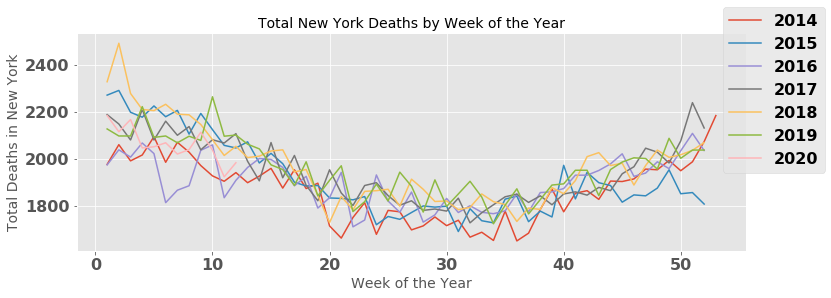

In [121]:
fig, ax = plt.subplots(figsize=(12,4))


for year in years[1:]:
    mask = (df_states_official['Calendar_Year'] == year) & (df_states_official['State'] =='New York')
    
    df = df_states_official[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_Deaths']

    
    ax.plot(x,y, label = year)
    
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

ax.set_title("Total New York Deaths by Week of the Year", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Total Deaths in New York", fontsize = 14)


In [122]:
mask = (df_states_official['Calendar_Year'] == 2020) & (df_states_official['State'] =='New York')
df = df_states_official[mask].sort_values('Week')

In [123]:
df

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
813,New York,2019-20,1,9.7,12,201,2185,> 100%,2020
814,New York,2019-20,2,9.2,14,180,2116,> 100%,2020
815,New York,2019-20,3,9.3,19,183,2168,> 100%,2020
816,New York,2019-20,4,8.8,9,172,2047,> 100%,2020
817,New York,2019-20,5,7.7,16,143,2052,> 100%,2020
818,New York,2019-20,6,8.1,21,146,2069,> 100%,2020
819,New York,2019-20,7,8.8,14,164,2021,> 100%,2020
820,New York,2019-20,8,8.9,22,159,2040,> 100%,2020
821,New York,2019-20,9,7.9,15,152,2114,> 100%,2020
822,New York,2019-20,10,8.9,22,159,2038,> 100%,2020


Text(0, 0.5, 'Total Deaths in California')

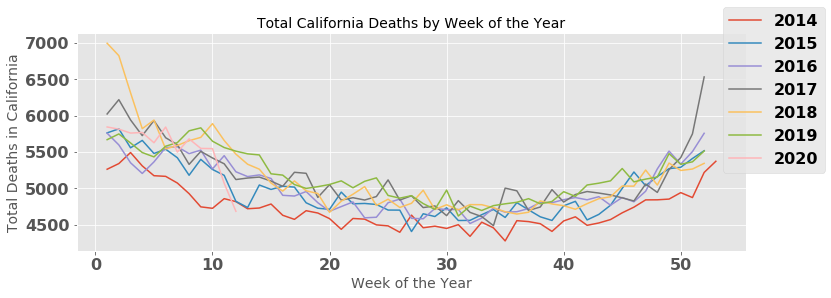

In [124]:
fig, ax = plt.subplots(figsize=(12,4))


for year in years[1:]:
    mask = (df_states_official['Calendar_Year'] == year) & (df_states_official['State'] =='California')
    
    df = df_states_official[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_Deaths']

    
    ax.plot(x,y, label = year)
    
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
ax.set_title("Total California Deaths by Week of the Year", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Total Deaths in California", fontsize = 14)


In [125]:
mask = (df_states_official['Calendar_Year'] == 2020) & (df_states_official['State'] =='California')
df = df_states_official[mask].sort_values('Week')
df

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
113,California,2019-20,1,8.5,41,457,5845,> 100%,2020
114,California,2019-20,2,7.9,48,409,5815,> 100%,2020
115,California,2019-20,3,9.7,63,494,5761,> 100%,2020
116,California,2019-20,4,8.7,69,432,5769,> 100%,2020
117,California,2019-20,5,8.4,57,415,5628,> 100%,2020
118,California,2019-20,6,8.6,65,438,5844,> 100%,2020
119,California,2019-20,7,8.8,70,414,5499,> 100%,2020
120,California,2019-20,8,9.0,69,445,5681,> 100%,2020
121,California,2019-20,9,8.6,69,409,5550,> 100%,2020
122,California,2019-20,10,9.1,53,450,5547,> 100%,2020


In [126]:
df_states_official.describe()

,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Calendar_Year
count,19587.000000,19587.000000,19587.000000,19587.000000,19587.000000,19587.000000
mean,25.949099,6.945260,2.865676,66.937459,1009.597897,2016.118650
std,15.233749,2.158992,8.025639,71.855409,998.293972,2.087588
min,1.000000,0.000000,0.000000,0.000000,23.000000,2013.000000
25%,12.000000,5.500000,0.000000,20.000000,293.000000,2014.000000
50%,26.000000,6.700000,0.000000,48.000000,783.000000,2016.000000
75%,39.000000,8.100000,2.000000,84.000000,1246.000000,2018.000000
max,53.000000,21.500000,272.000000,736.000000,6998.000000,2020.000000


In [127]:
mask_state_incomplete = df_states_official['Percent_Complete'] != '> 100%'

In [128]:
df_state_incomplete = df_states_official[mask_state_incomplete]

In [129]:
df_state_incomplete.describe()

,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Calendar_Year
count,8804.00000,8804.000000,8804.000000,8804.000000,8804.000000,8804.000000
mean,29.48035,6.503090,0.525557,59.863358,943.337574,2015.308383
std,11.04143,1.884706,1.660606,62.803970,938.423269,1.942539
min,1.00000,0.000000,0.000000,0.000000,23.000000,2013.000000
25%,22.00000,5.300000,0.000000,18.000000,268.000000,2014.000000
50%,30.00000,6.300000,0.000000,43.000000,724.000000,2015.000000
75%,38.00000,7.500000,0.000000,76.000000,1156.000000,2017.000000
max,53.00000,20.300000,32.000000,503.000000,4915.000000,2020.000000


In [130]:
df_state_incomplete.head()

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,Alabama,2019-20,40,5.0,0,48,955,98.3%,2019
1,Alabama,2019-20,41,3.8,0,36,940,96.8%,2019
4,Alabama,2019-20,44,5.7,2,53,962,99%,2019
22,Alabama,2019-20,10,6.7,12,53,964,99.2%,2020
23,Alabama,2019-20,11,6.1,5,48,868,89.4%,2020


In [131]:
df_state_incomplete.groupby('State').count()['Week']

State
Alabama                 153
Alaska                  175
Arizona                 145
Arkansas                182
California              199
Colorado                161
Connecticut             186
Delaware                163
District of Columbia    188
Florida                 144
Georgia                 154
Hawaii                  171
Idaho                   145
Illinois                187
Indiana                 179
Iowa                    177
Kansas                  177
Kentucky                179
Louisiana               187
Maine                   169
Maryland                159
Massachusetts           187
Michigan                171
Minnesota               161
Mississippi             180
Missouri                180
Montana                 164
Nebraska                177
Nevada                  151
New Hampshire           155
New Jersey              186
New Mexico              157
New York                184
New York City           192
North Carolina          160
North Dakota  

In [132]:
mask = df_state_incomplete['State'] == 'California'
df_state_incomplete[mask].sort_values(['Calendar_Year','Week'])

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
17732,California,2012-13,1,10.0,5,386,3897,79.3%,2013
17743,California,2012-13,12,10.6,10,503,4843,98.5%,2013
17744,California,2012-13,13,10.5,4,498,4800,97.7%,2013
17745,California,2012-13,14,8.4,6,385,4632,94.2%,2013
17746,California,2012-13,15,9.2,4,427,4699,95.6%,2013
...,...,...,...,...,...,...,...,...,...
1557,California,2018-19,37,5.1,4,242,4858,98.8%,2019
1558,California,2018-19,38,5.8,1,276,4787,97.4%,2019
1559,California,2018-19,39,5.9,0,282,4819,98%,2019
101,California,2019-20,41,6.3,0,307,4889,99.5%,2019


In [133]:
df_states_official.describe()

,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Calendar_Year
count,19587.000000,19587.000000,19587.000000,19587.000000,19587.000000,19587.000000
mean,25.949099,6.945260,2.865676,66.937459,1009.597897,2016.118650
std,15.233749,2.158992,8.025639,71.855409,998.293972,2.087588
min,1.000000,0.000000,0.000000,0.000000,23.000000,2013.000000
25%,12.000000,5.500000,0.000000,20.000000,293.000000,2014.000000
50%,26.000000,6.700000,0.000000,48.000000,783.000000,2016.000000
75%,39.000000,8.100000,2.000000,84.000000,1246.000000,2018.000000
max,53.000000,21.500000,272.000000,736.000000,6998.000000,2020.000000


In [134]:
df_states_official.head()

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,Alabama,2019-20,40,5.0,0,48,955,98.3%,2019
1,Alabama,2019-20,41,3.8,0,36,940,96.8%,2019
2,Alabama,2019-20,42,4.5,0,45,1011,> 100%,2019
3,Alabama,2019-20,43,4.4,2,42,998,> 100%,2019
4,Alabama,2019-20,44,5.7,2,53,962,99%,2019


In [135]:
df_states_official['Percent_Complete'] = df_states_official['Percent_Complete'].str.replace('> 100%', '100%', regex=False)

In [136]:
df_states_official.head()

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,Alabama,2019-20,40,5.0,0,48,955,98.3%,2019
1,Alabama,2019-20,41,3.8,0,36,940,96.8%,2019
2,Alabama,2019-20,42,4.5,0,45,1011,100%,2019
3,Alabama,2019-20,43,4.4,2,42,998,100%,2019
4,Alabama,2019-20,44,5.7,2,53,962,99%,2019


In [137]:
df_states_official['Percent_Complete'].unique()

array(['98.3%', '96.8%', '100%', '99%', '99.2%', '89.4%', '69.7%',
       '86.1%', '99.6%', '94.7%', '84.9%', '76.2%', '28.3%', '97.7%',
       '92.6%', '96.6%', '90.6%', '79.9%', '99.5%', '95.3%', '98.6%',
       '96%', '89.3%', '86.2%', '86.4%', '88.8%', '39.4%', '95.7%',
       '98.8%', '89%', '90.9%', '57.9%', '74.4%', '62.8%', '48.8%',
       '88.1%', '90.2%', '93.4%', '95.6%', '67.7%', '56.9%', '98.9%',
       '65.2%', '92.8%', '93.8%', '97.1%', '98.1%', '75.6%', '97%',
       '99.1%', '91.3%', '51.7%', '78.9%', '95.2%', '80.5%', '99.8%',
       '84.4%', '71.1%', '37.7%', '94.3%', '96.2%', '89.2%', '78.7%',
       '54.9%', '99.7%', '97.8%', '82.9%', '91.4%', '96.4%', '97.5%',
       '99.3%', '70.4%', '99.9%', '92.4%', '94.5%', '37.1%', '50.6%',
       '83.8%', '95.5%', '96.9%', '76.8%', '66%', '73.4%', '21.1%',
       '96.1%', '70.2%', '86.7%', '68.1%', '37%', '94.6%', '97.3%',
       '93.5%', '94.9%', '94.1%', '80.3%', '63.1%', '83.2%', '60.5%',
       '92.1%', '91%', '99.4%', '

In [138]:
df_states_official['Percent_Complete'] = df_states_official['Percent_Complete'].str.rstrip('%').astype('float') / 100.0

In [139]:
df_states_official['Percent_Complete'].unique()

array([0.983, 0.968, 1.   , 0.99 , 0.992, 0.894, 0.697, 0.861, 0.996,
       0.947, 0.849, 0.762, 0.283, 0.977, 0.926, 0.966, 0.906, 0.799,
       0.995, 0.953, 0.986, 0.96 , 0.893, 0.862, 0.864, 0.888, 0.394,
       0.957, 0.988, 0.89 , 0.909, 0.579, 0.744, 0.628, 0.488, 0.881,
       0.902, 0.934, 0.956, 0.677, 0.569, 0.989, 0.652, 0.928, 0.938,
       0.971, 0.981, 0.756, 0.97 , 0.991, 0.913, 0.517, 0.789, 0.952,
       0.805, 0.998, 0.844, 0.711, 0.377, 0.943, 0.962, 0.892, 0.787,
       0.549, 0.997, 0.978, 0.829, 0.914, 0.964, 0.975, 0.993, 0.704,
       0.999, 0.924, 0.945, 0.371, 0.506, 0.838, 0.955, 0.969, 0.768,
       0.66 , 0.734, 0.211, 0.961, 0.702, 0.867, 0.681, 0.37 , 0.946,
       0.973, 0.935, 0.949, 0.941, 0.803, 0.631, 0.832, 0.605, 0.921,
       0.91 , 0.994, 0.984, 0.917, 0.848, 0.772, 0.779, 0.76 , 0.758,
       0.773, 0.747, 0.782, 0.8  , 0.98 , 0.954, 0.574, 0.274, 0.814,
       0.93 , 0.684, 0.896, 0.927, 0.627, 0.851, 0.979, 0.714, 0.92 ,
       0.898, 0.987,

In [152]:
df_states_official['Percent_P_I'] = df_states_official['Percent_P_I']/ 100.0

In [153]:
df_states_official.describe()

,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
count,19587.000000,19587.000000,19587.000000,19587.000000,19587.000000,19587.000000,19587.000000
mean,25.949099,0.069453,2.865676,66.937459,1009.597897,0.971480,2016.118650
std,15.233749,0.021590,8.025639,71.855409,998.293972,0.048807,2.087588
min,1.000000,0.000000,0.000000,0.000000,23.000000,0.211000,2013.000000
25%,12.000000,0.055000,0.000000,20.000000,293.000000,0.954000,2014.000000
50%,26.000000,0.067000,0.000000,48.000000,783.000000,1.000000,2016.000000
75%,39.000000,0.081000,2.000000,84.000000,1246.000000,1.000000,2018.000000
max,53.000000,0.215000,272.000000,736.000000,6998.000000,1.000000,2020.000000


In [141]:
df_states_official.head()

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,Alabama,2019-20,40,5.0,0,48,955,0.983,2019
1,Alabama,2019-20,41,3.8,0,36,940,0.968,2019
2,Alabama,2019-20,42,4.5,0,45,1011,1.000,2019
3,Alabama,2019-20,43,4.4,2,42,998,1.000,2019
4,Alabama,2019-20,44,5.7,2,53,962,0.990,2019


In [142]:
df_states_official.sort_values(['State','Calendar_Year','Week']).reset_index()

,index,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,17576,Alabama,2012-13,1,8.8,4,73,874,0.900,2013
1,17577,Alabama,2012-13,2,9.3,12,100,1200,1.000,2013
2,17578,Alabama,2012-13,3,10.0,8,102,1105,1.000,2013
3,17579,Alabama,2012-13,4,9.8,4,100,1060,1.000,2013
4,17580,Alabama,2012-13,5,8.3,2,83,1026,1.000,2013
...,...,...,...,...,...,...,...,...,...,...
19582,1270,Wyoming,2019-20,8,5.8,0,6,104,1.000,2020
19583,1271,Wyoming,2019-20,9,3.7,0,4,108,1.000,2020
19584,1272,Wyoming,2019-20,10,12.5,1,9,80,0.891,2020
19585,1273,Wyoming,2019-20,11,4.9,0,4,82,0.914,2020


In [143]:
df_states_official = df_states_official.sort_values(['State','Calendar_Year','Week']).reset_index()

In [144]:
# df_states_official.drop('index', axis = 1, inplace = True)


In [145]:
df_states_official.head()

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,Alabama,2012-13,1,8.8,4,73,874,0.9,2013
1,Alabama,2012-13,2,9.3,12,100,1200,1.0,2013
2,Alabama,2012-13,3,10.0,8,102,1105,1.0,2013
3,Alabama,2012-13,4,9.8,4,100,1060,1.0,2013
4,Alabama,2012-13,5,8.3,2,83,1026,1.0,2013


In [146]:
df_states_official.describe()
#only permanent change from original data set was removing 11 rows for Connecticut, 5 for NC, and 1 for WV when they had Insufficient Data Values

,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
count,19587.000000,19587.000000,19587.000000,19587.000000,19587.000000,19587.000000,19587.000000
mean,25.949099,6.945260,2.865676,66.937459,1009.597897,0.971480,2016.118650
std,15.233749,2.158992,8.025639,71.855409,998.293972,0.048807,2.087588
min,1.000000,0.000000,0.000000,0.000000,23.000000,0.211000,2013.000000
25%,12.000000,5.500000,0.000000,20.000000,293.000000,0.954000,2014.000000
50%,26.000000,6.700000,0.000000,48.000000,783.000000,1.000000,2016.000000
75%,39.000000,8.100000,2.000000,84.000000,1246.000000,1.000000,2018.000000
max,53.000000,21.500000,272.000000,736.000000,6998.000000,1.000000,2020.000000


In [147]:
mask = df_states_official['Percent_Complete'] <1.0
df_states_incomplete = df_states_official[mask]

df_states_incomplete.groupby('State').count()['Week']

State
Alabama                 150
Alaska                  175
Arizona                 143
Arkansas                177
California              198
Colorado                161
Connecticut             182
Delaware                163
District of Columbia    188
Florida                 142
Georgia                 154
Hawaii                  166
Idaho                   145
Illinois                187
Indiana                 179
Iowa                    177
Kansas                  177
Kentucky                179
Louisiana               187
Maine                   169
Maryland                159
Massachusetts           187
Michigan                170
Minnesota               161
Mississippi             180
Missouri                180
Montana                 164
Nebraska                177
Nevada                  147
New Hampshire           148
New Jersey              186
New Mexico              154
New York                184
New York City           190
North Carolina          160
North Dakota  

In [148]:
df_states_incomplete.groupby('State').mean()['Percent_Complete']

State
Alabama                 0.931793
Alaska                  0.901966
Arizona                 0.932748
Arkansas                0.941209
California              0.949884
Colorado                0.941621
Connecticut             0.933209
Delaware                0.913153
District of Columbia    0.910963
Florida                 0.951648
Georgia                 0.944500
Hawaii                  0.938982
Idaho                   0.935048
Illinois                0.951963
Indiana                 0.945034
Iowa                    0.935588
Kansas                  0.944333
Kentucky                0.942771
Louisiana               0.950193
Maine                   0.934899
Maryland                0.944969
Massachusetts           0.943599
Michigan                0.948612
Minnesota               0.944565
Mississippi             0.950889
Missouri                0.949783
Montana                 0.926177
Nebraska                0.934571
Nevada                  0.931503
New Hampshire           0.919236
New 

In [149]:
mask = df_states_official['Percent_Complete'] <.98
df_states_incomplete = df_states_official[mask]

df_states_incomplete.groupby('State').count()

,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
State,,,,,,,,
Alabama,118,118,118,118,118,118,118,118
Alaska,143,143,143,143,143,143,143,143
Arizona,117,117,117,117,117,117,117,117
Arkansas,141,141,141,141,141,141,141,141
California,157,157,157,157,157,157,157,157
Colorado,116,116,116,116,116,116,116,116
Connecticut,153,153,153,153,153,153,153,153
Delaware,138,138,138,138,138,138,138,138
District of Columbia,163,163,163,163,163,163,163,163


In [150]:
df_states_official.to_csv('data/state_cdc_pandas_df.csv')